# Clustering


## Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import joblib
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from __future__ import print_function

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score
print(__doc__)
range_n_clusters = [2, 3, 4, 5, 6]

# we are using the scipy implementation
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, inconsistent

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
%matplotlib inline

Automatically created module for IPython interactive environment


In [2]:
# define the color palettes
data_colors = ['#a6cdf6','#b2d0b7','#f98ea1', '#ffc0cb', '#800080', '#FFFF00']
background_cmap3 = ListedColormap(['#a6cdf6','#b2d0b7','#f98ea1'])
centroid_colors = ['#1b80e8','#599062','#e20c32','#FF1493', '#800080', '#FFD700' ]
centroid_cmap = ListedColormap(centroid_colors)

## Importing data

In [3]:
current_directory = os.getcwd()
file_name = 'data_ccs.csv'
data_ccs = pd.read_csv(os.path.join(current_directory, file_name), index_col="Unnamed: 0")
print(data_ccs)

      Age  Education  Affective Symptoms  Rumination  Behavioural Symptoms  \
0    42.0        5.0                2.75    2.333333              1.666667   
1    51.0       18.0                2.25    2.333333              3.000000   
2    40.0        8.0                2.50    3.000000              3.000000   
3    19.0       25.0                1.50    0.000000              2.333333   
4    42.0       13.0                2.00    2.000000              1.333333   
..    ...        ...                 ...         ...                   ...   
155  29.0       18.0                0.25    0.333333              0.000000   
156  40.0       13.0                1.75    2.000000              1.000000   
157  40.0       13.0                2.25    2.000000              2.666667   
158  41.0        8.0                2.75    2.666667              3.000000   
159  55.0        8.0                2.50    3.000000              3.000000   

     Anxiety Personal Impact  Attribution Skepticism  Impact Sk

In [5]:
current_directory = os.getcwd()
file_name = 'final_df.csv'
final_df = pd.read_csv(os.path.join(current_directory, file_name), index_col="Unnamed: 0")
print(final_df)

      Age  Education  Affective Symptoms  Rumination  Behavioural Symptoms  \
0    42.0        5.0                2.75    2.333333              1.666667   
1    51.0       18.0                2.25    2.333333              3.000000   
2    40.0        8.0                2.50    3.000000              3.000000   
3    19.0       25.0                1.50    0.000000              2.333333   
4    42.0       13.0                2.00    2.000000              1.333333   
..    ...        ...                 ...         ...                   ...   
155  29.0       18.0                0.25    0.333333              0.000000   
156  40.0       13.0                1.75    2.000000              1.000000   
157  40.0       13.0                2.25    2.000000              2.666667   
158  41.0        8.0                2.75    2.666667              3.000000   
159  55.0        8.0                2.50    3.000000              3.000000   

     Anxiety Personal Impact  Attribution Skepticism  Impact Sk

## Scaling

In [67]:
# You create a MinMaxScaler object called min_max_scaler. This object will be used to perform the min-max scaling.
# You apply the fit_transform method of the MinMaxScaler to scale the data in the DataFrame df and store the scaled data in np_df.

# EXTRA: The inverse_transform method is used to revert the scaling
# transformation performed by the MinMaxScaler back to the original scale.
# In your code, you are trying to reverse the scaling and obtain the original data.

print(data_ccs)
min_max_scaler = preprocessing.MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(data_ccs)
X_nrm = pd.DataFrame(normalized_data, columns=data_ccs.columns)
# print(X_nrm)

std_scaler = StandardScaler()
standardized_data = std_scaler.fit_transform(data_ccs)
X_std = pd.DataFrame(standardized_data, columns=data_ccs.columns)
#joblib.dump(std_scaler, 'scaler')

      Age  Education  Affective Symptoms  Rumination  Behavioural Symptoms  \
0    42.0        5.0                2.75    2.333333              1.666667   
1    51.0       18.0                2.25    2.333333              3.000000   
2    40.0        8.0                2.50    3.000000              3.000000   
3    19.0       25.0                1.50    0.000000              2.333333   
4    42.0       13.0                2.00    2.000000              1.333333   
..    ...        ...                 ...         ...                   ...   
155  29.0       18.0                0.25    0.333333              0.000000   
156  40.0       13.0                1.75    2.000000              1.000000   
157  40.0       13.0                2.25    2.000000              2.666667   
158  41.0        8.0                2.75    2.666667              3.000000   
159  55.0        8.0                2.50    3.000000              3.000000   

     Anxiety Personal Impact  Attribution Skepticism  Impact Sk

## K-Means

#### Normalized Data

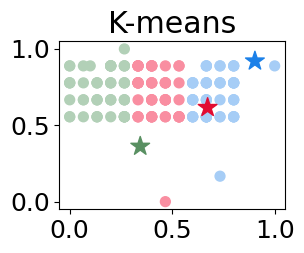

In [68]:
model_nrm = KMeans(n_clusters=3, n_init='auto').fit(X_nrm)
y_pred_nrm = model_nrm.predict(X_nrm)
plt.subplot(221)
plt.scatter(X_nrm['Trend Skepticism'], X_nrm['Response Skepticism'], s=50, c=[data_colors[y] for y in y_pred_nrm])
plt.scatter(model_nrm.cluster_centers_[:,3], model_nrm.cluster_centers_[:,4], marker='*', s=200, c=centroid_colors[:len(model_nrm.cluster_centers_)])
plt.title("K-means")
    
# print(y_pred_nrm)
final_df['Cluster'] = y_pred_nrm
#final_df.to_csv('Nrm_kmeans3_df.csv')
# final_df.to_csv('Nrm_kmeans6_df.csv')

#### Standardized Data

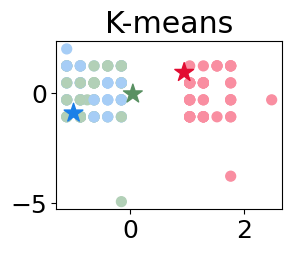

In [69]:
model_std = KMeans(n_clusters=3, n_init='auto').fit(X_std)
y_pred_std = model_std.predict(X_std)
plt.subplot(221)
plt.scatter(X_std['Impact Skepticism'], X_std['Response Skepticism'], s=50, c=[data_colors[y] for y in y_pred_std])
plt.scatter(model_std.cluster_centers_[:,2], model_std.cluster_centers_[:,4], marker='*', s=200, c=centroid_colors[:len(model_std.cluster_centers_)])
plt.title("K-means")


# print(y_pred_nrm)
final_df['Cluster'] = y_pred_nrm
# final_df.to_csv('Std_kmeans3_df.csv')
# final_df.to_csv('Std_kmeans6_df.csv')

#### Knee-elbow analysis

In [70]:
def KneeElbowAnalysis(x,max_k=20):
    k_values = range(2,max_k)
    clusterings = [KMeans(n_clusters=k, random_state=random_state, n_init='auto').fit(x) for k in k_values]
    centroids = [clustering.cluster_centers_ for clustering in clusterings]

    D_k = [cdist(x, cent, 'euclidean') for cent in centroids]
    cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/x.shape[0] for d in dist]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]

    tss = sum(pdist(x)**2)/x.shape[0]
    bss = tss-wcss

    kIdx = 10-1
    
    #
    # elbow curve
    #
    fig = plt.figure()
    font = {'family' : 'sans', 'size'   : 12}
    plt.rc('font', **font)
    plt.xticks(k_values)
    plt.plot(k_values, wcss, 'o-', color='red', label='WCSS')
    plt.plot(k_values, bss, 'o-', color='blue', label='BCSS')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.legend()
    plt.title('KMeans Clustering');

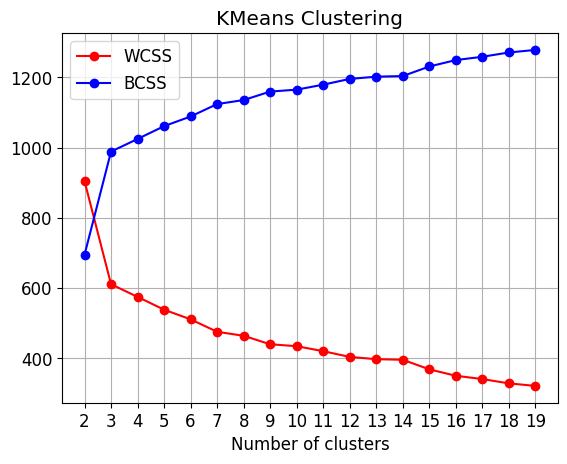

In [71]:
random_state=10
KneeElbowAnalysis(X_std)

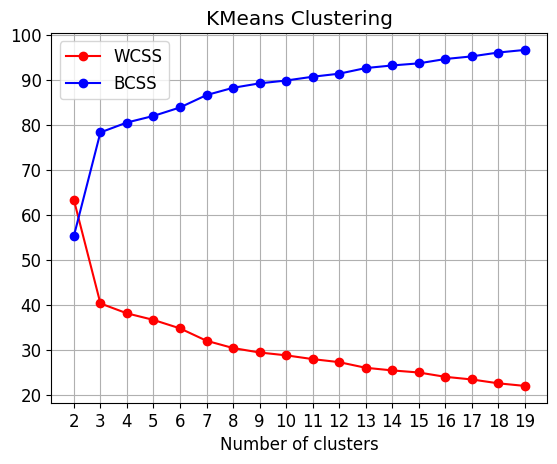

In [72]:
KneeElbowAnalysis(X_nrm)

## Hierarchical Clustering

In [73]:
def plot_dendrogram():
    plt.figure(figsize=(25, 10))
    font = {'family' : 'sans', 'size'   : 18}
    plt.rc('font', **font)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    dendrogram(Z, 
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    ) 
    plt.show()
    """
    dendrogram(
        Z,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=25,  # show only the last p merged clusters
        show_leaf_counts=True,  # otherwise numbers in brackets are counts
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=False,  # to get a distribution impression in truncated branches
    )
    """
  

In [74]:
def get_inconsistency(d):
    print("\nInconsistency analysis for d = ", d)
    inconsistency = inconsistent(Z, d)
    for i in reversed(range(1,20)):
        print("from %d to %d => Inconsistency %.3f"%(i,i+1,inconsistency[-i][3]))

#### Normalized Data (This is the final clustered dataset)

Z has 159 rows


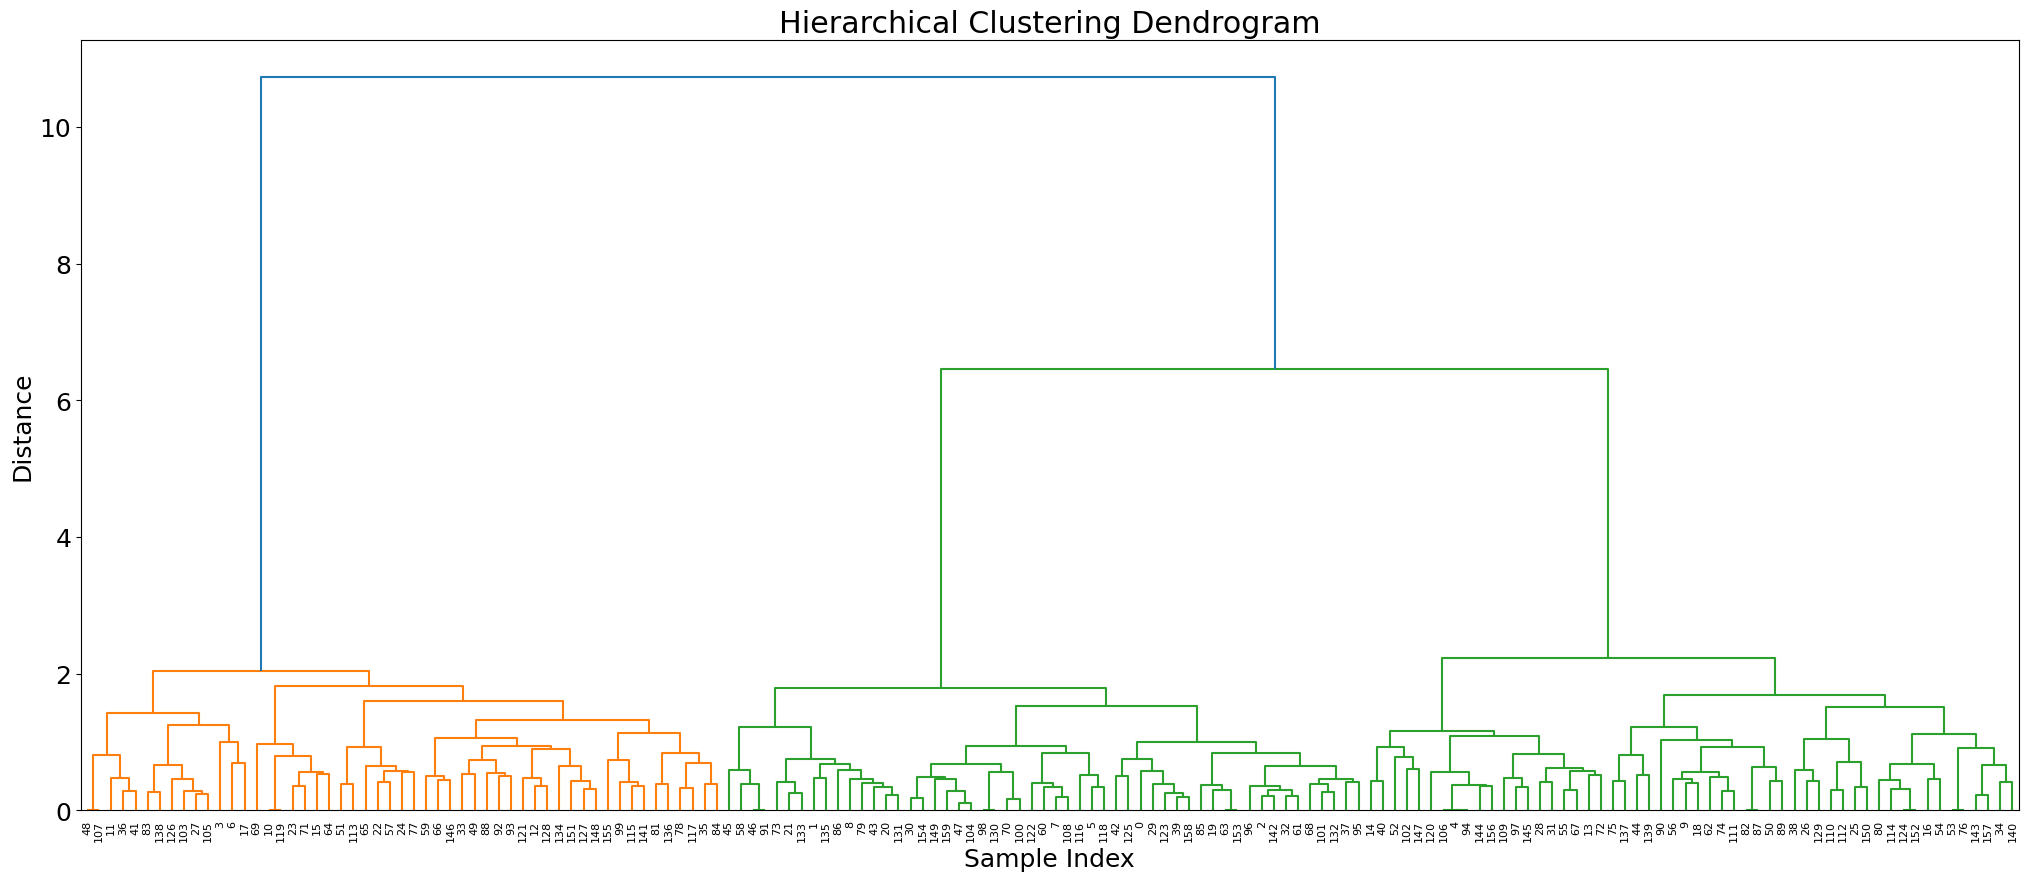


Inconsistency analysis for d =  10
from 19 to 20 => Inconsistency 2.175
from 18 to 19 => Inconsistency 1.821
from 17 to 18 => Inconsistency 1.968
from 16 to 17 => Inconsistency 1.991
from 15 to 16 => Inconsistency 2.561
from 14 to 15 => Inconsistency 1.996
from 13 to 14 => Inconsistency 1.731
from 12 to 13 => Inconsistency 2.498
from 11 to 12 => Inconsistency 1.934
from 10 to 11 => Inconsistency 2.419
from 9 to 10 => Inconsistency 3.552
from 8 to 9 => Inconsistency 3.021
from 7 to 8 => Inconsistency 2.688
from 6 to 7 => Inconsistency 3.754
from 5 to 6 => Inconsistency 3.174
from 4 to 5 => Inconsistency 3.235
from 3 to 4 => Inconsistency 3.763
from 2 to 3 => Inconsistency 8.412
from 1 to 2 => Inconsistency 9.873

Inconsistency analysis for d =  20
from 19 to 20 => Inconsistency 2.175
from 18 to 19 => Inconsistency 1.821
from 17 to 18 => Inconsistency 1.968
from 16 to 17 => Inconsistency 1.991
from 15 to 16 => Inconsistency 2.561
from 14 to 15 => Inconsistency 1.996
from 13 to 14 => Inc

In [75]:
Z = linkage(X_nrm, 'ward')
print('Z has %d rows'%(len(Z)))
plot_dendrogram()
get_inconsistency(10)
get_inconsistency(20)
n_clusters = 7
cluster_labels = []
silhouette_avg = []
for i in range(2, n_clusters):
    cluster_labels.append(fcluster(Z, i, criterion='maxclust'))
    labels, counts = np.unique(cluster_labels[i-2], return_counts=True)
    silhouette_avg.append(silhouette_score(X_nrm, cluster_labels[i-2]))
    print(labels, counts, silhouette_avg[i-2])
    

Normalized_final_df = final_df
# print(cluster_labels[2])
Normalized_final_df['Cluster'] = cluster_labels[1]
Normalized_final_df.to_csv('Clustered_df.csv')
Normalized_final_df['Cluster'] = cluster_labels[2]
#Normalized_final_df.to_csv('Normalized_final_df_4clusters.csv')

#### Standardized Data

Z has 159 rows


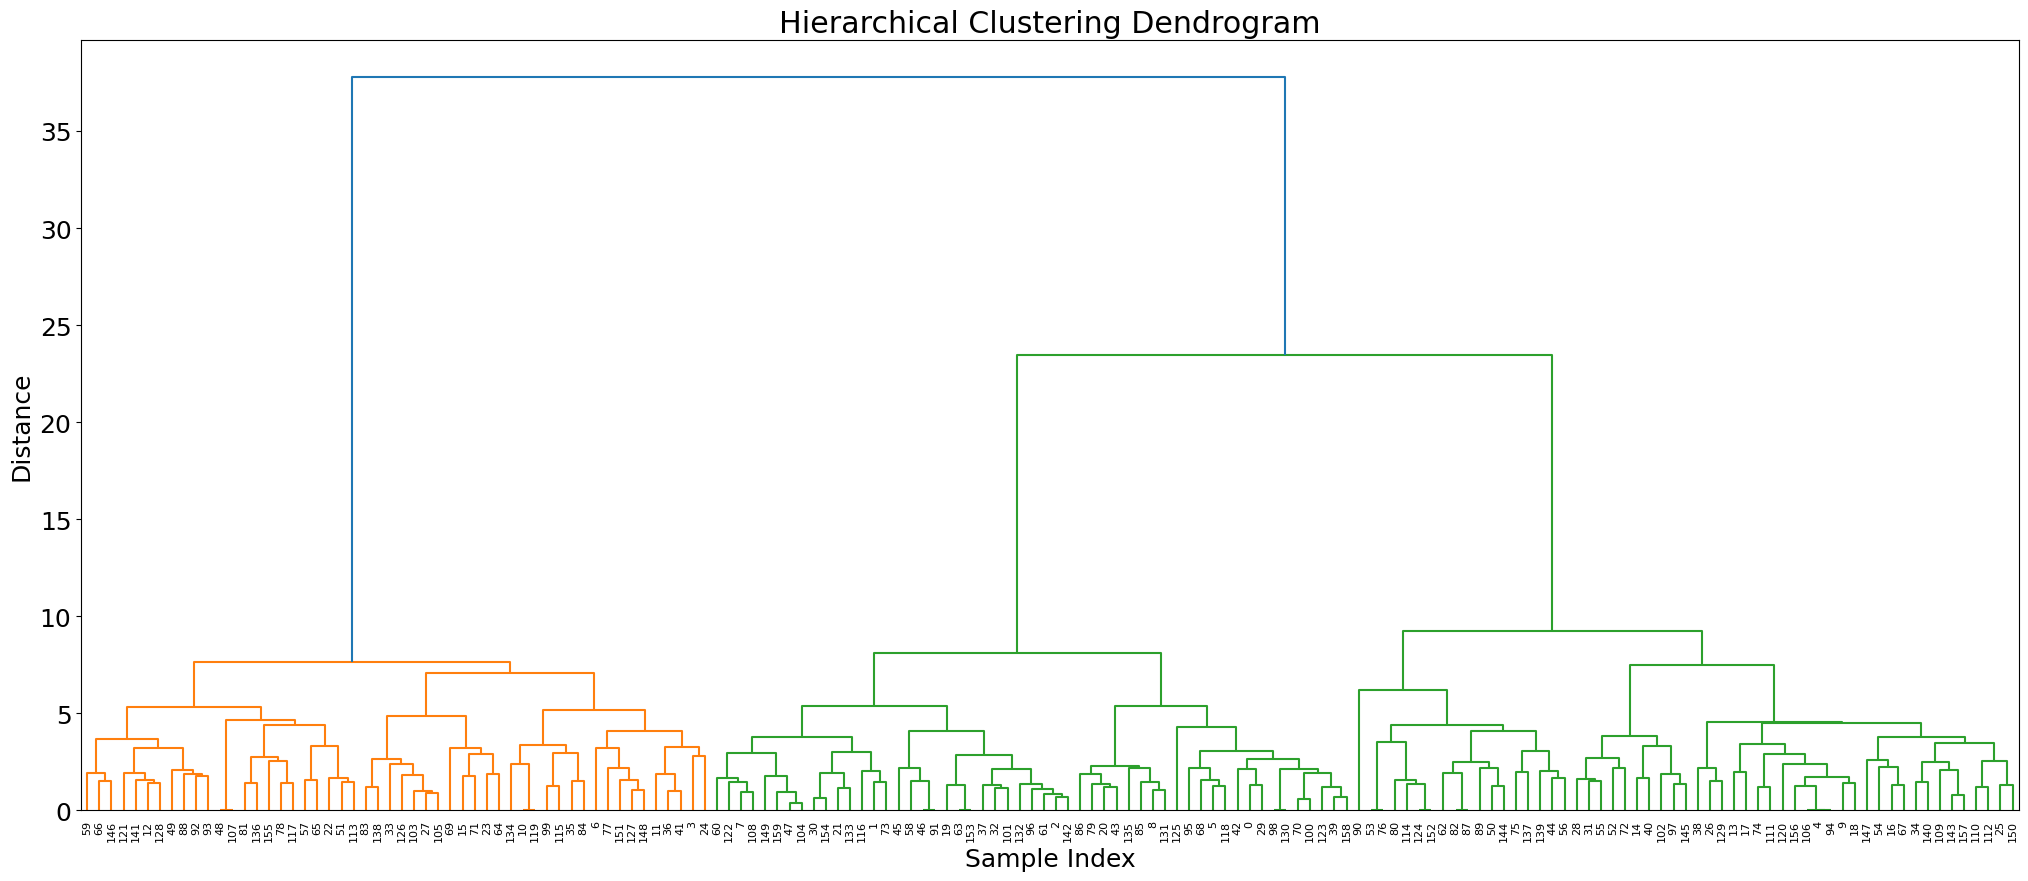


Inconsistency analysis for d =  5
from 19 to 20 => Inconsistency 2.055
from 18 to 19 => Inconsistency 1.798
from 17 to 18 => Inconsistency 2.001
from 16 to 17 => Inconsistency 2.205
from 15 to 16 => Inconsistency 1.789
from 14 to 15 => Inconsistency 1.662
from 13 to 14 => Inconsistency 2.215
from 12 to 13 => Inconsistency 2.083
from 11 to 12 => Inconsistency 2.085
from 10 to 11 => Inconsistency 2.692
from 9 to 10 => Inconsistency 2.598
from 8 to 9 => Inconsistency 2.237
from 7 to 8 => Inconsistency 2.856
from 6 to 7 => Inconsistency 3.101
from 5 to 6 => Inconsistency 2.547
from 4 to 5 => Inconsistency 3.316
from 3 to 4 => Inconsistency 2.795
from 2 to 3 => Inconsistency 4.474
from 1 to 2 => Inconsistency 4.411

Inconsistency analysis for d =  10
from 19 to 20 => Inconsistency 2.286
from 18 to 19 => Inconsistency 1.798
from 17 to 18 => Inconsistency 2.001
from 16 to 17 => Inconsistency 2.178
from 15 to 16 => Inconsistency 2.081
from 14 to 15 => Inconsistency 1.662
from 13 to 14 => Inco

In [76]:
Z = linkage(X_std, 'ward')
print('Z has %d rows'%(len(Z)))
plot_dendrogram()
get_inconsistency(5)
get_inconsistency(10)
n_clusters = 7
cluster_labels = []
silhouette_avg = []
for i in range(2, n_clusters):
    cluster_labels.append(fcluster(Z, i, criterion='maxclust'))
    #print(cluster_labels)
    labels, counts = np.unique(cluster_labels[i-2], return_counts=True)
    silhouette_avg.append(silhouette_score(X_std, cluster_labels[i-2]))
    print(labels, counts, silhouette_avg[i-2])
    
Std_final_df = data_ccs
# print(cluster_labels[2])
Std_final_df['Cluster'] = cluster_labels[1]
#Std_final_df.to_csv('Std_final_df_3clusters.csv')
Std_final_df['Cluster'] = cluster_labels[2]
#Std_final_df.to_csv('Std_final_df_4clusters.csv')


# Silhouette visualization

### Kmeans silhouette

For n_clusters = 2 The average silhouette_score is : 0.40984232308871926


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.378411891496341
For n_clusters = 4 The average silhouette_score is : 0.30913529352990204


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.2251981001676513
For n_clusters = 6 The average silhouette_score is : 0.2442836189571743


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.1588590340713659


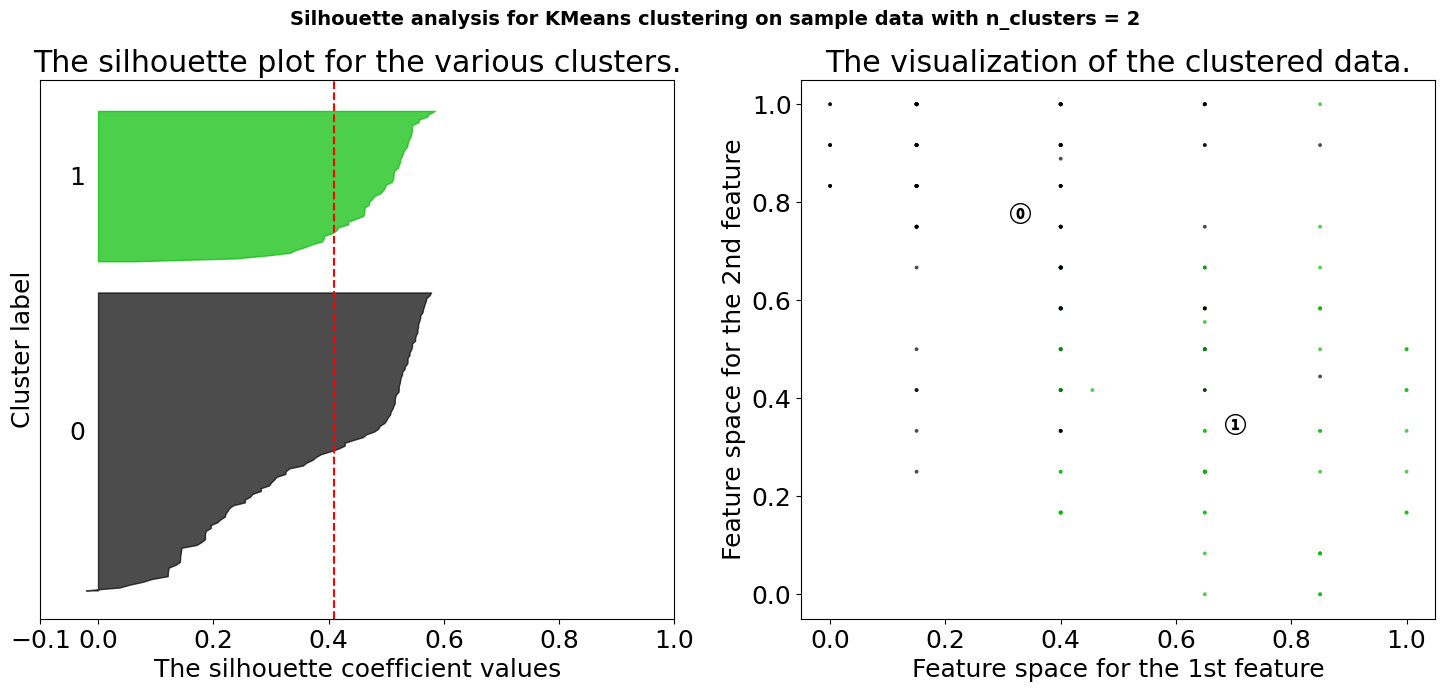

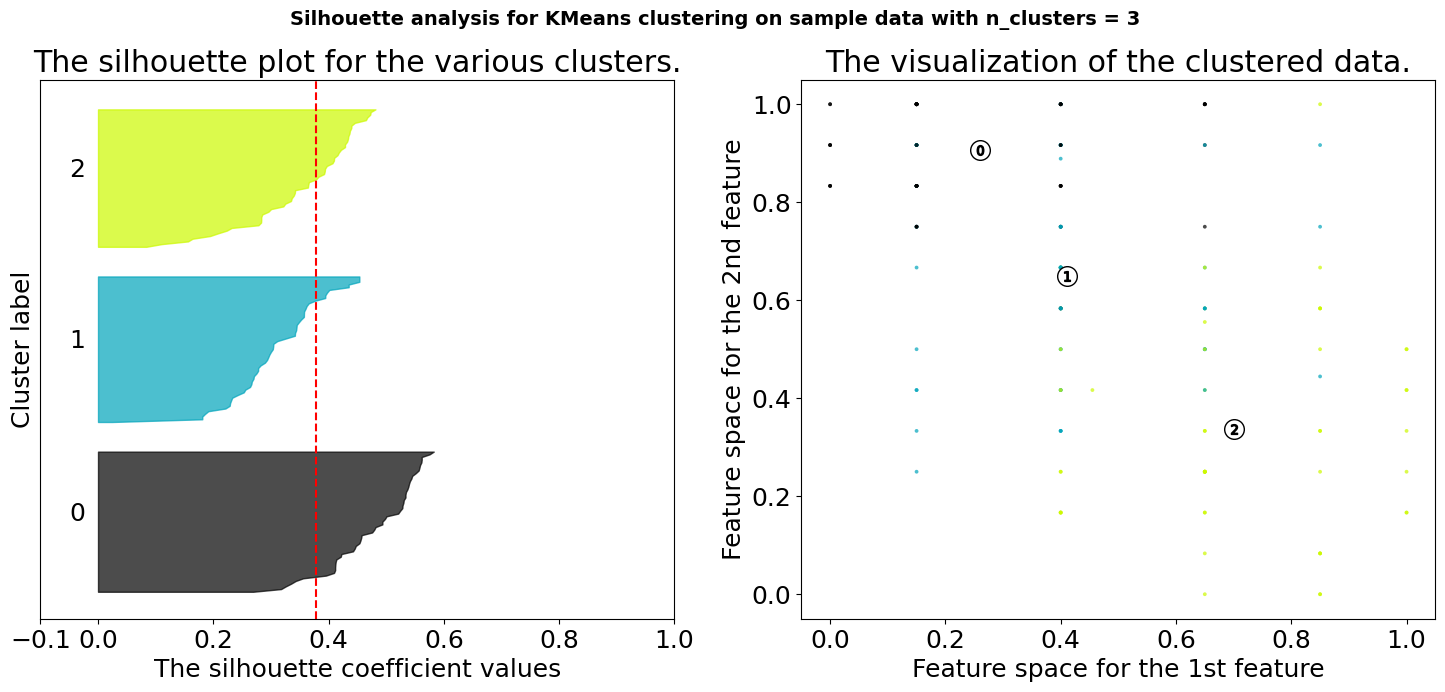

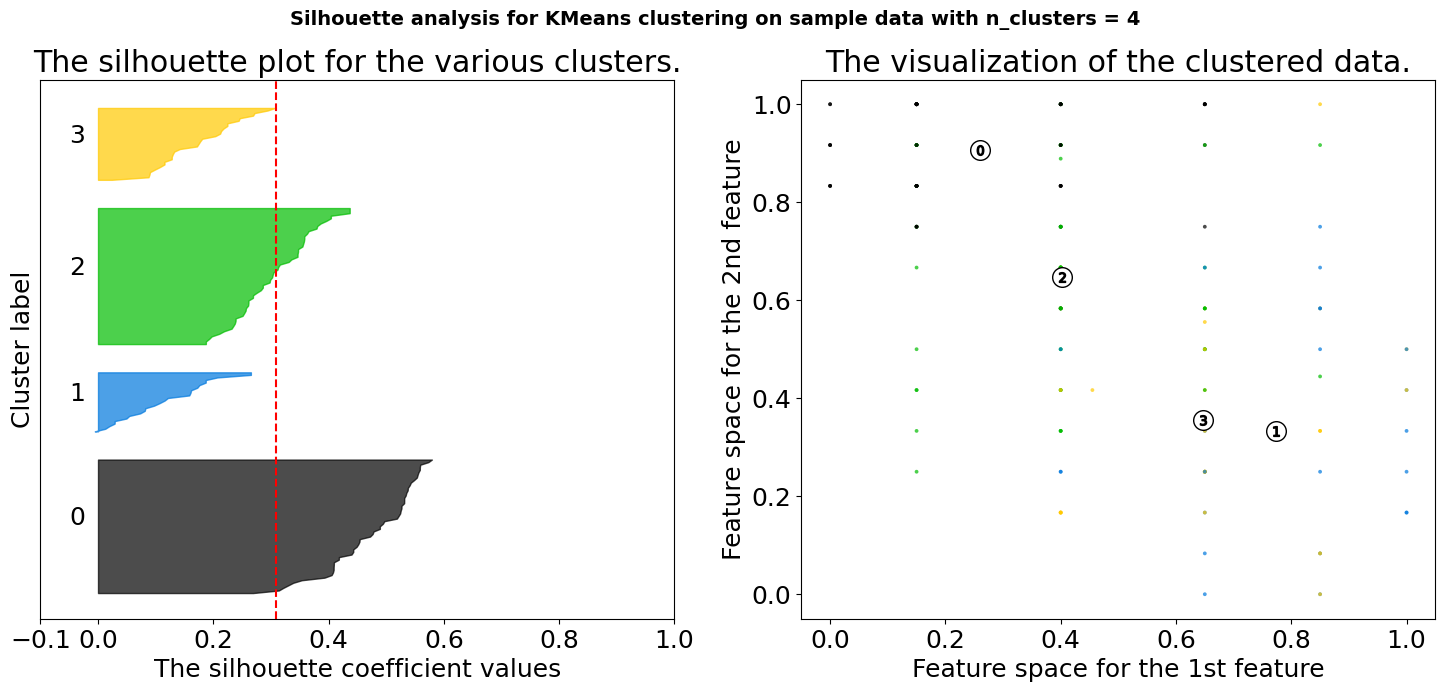

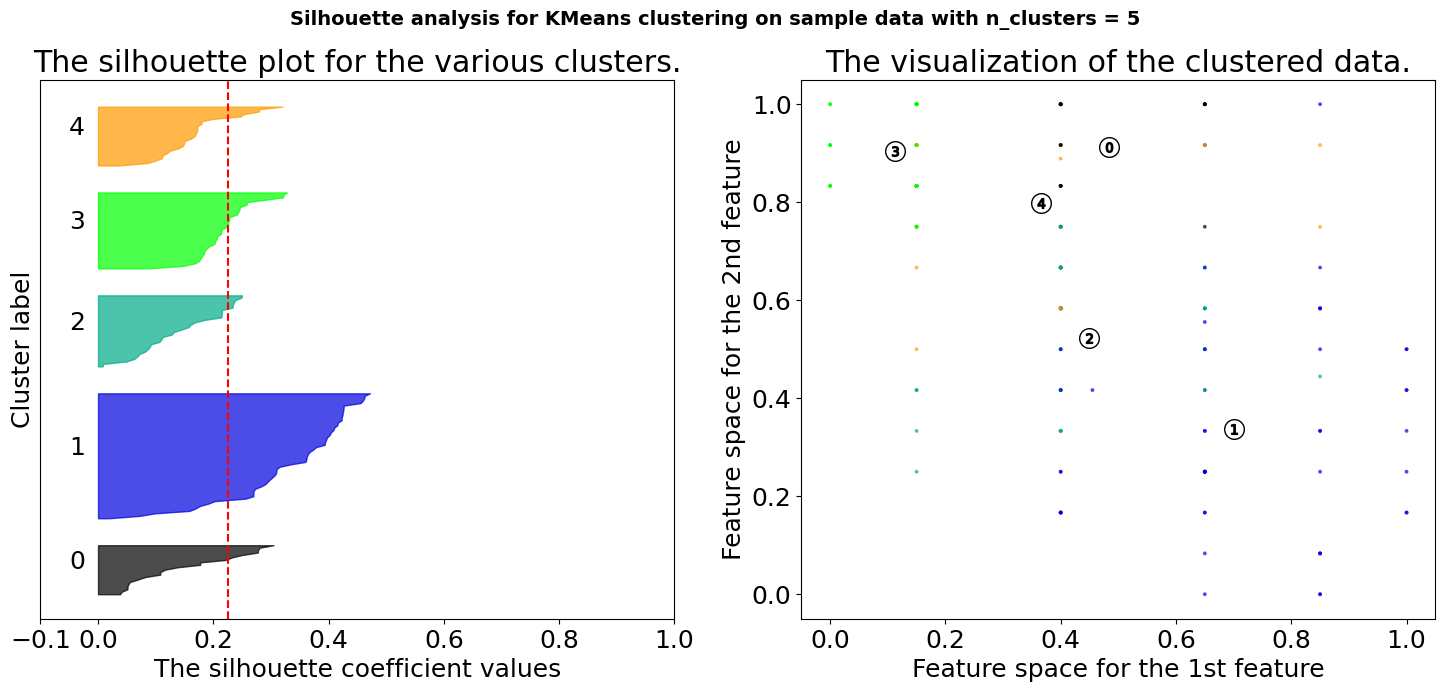

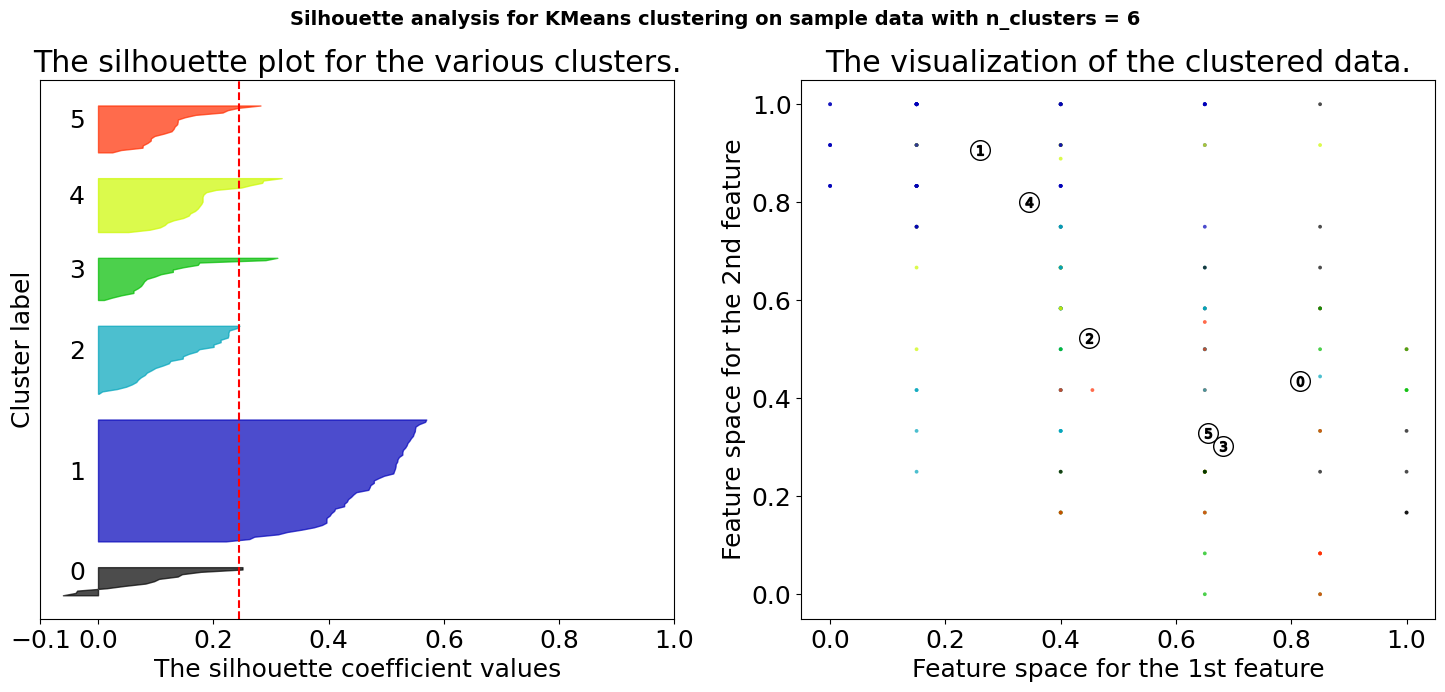

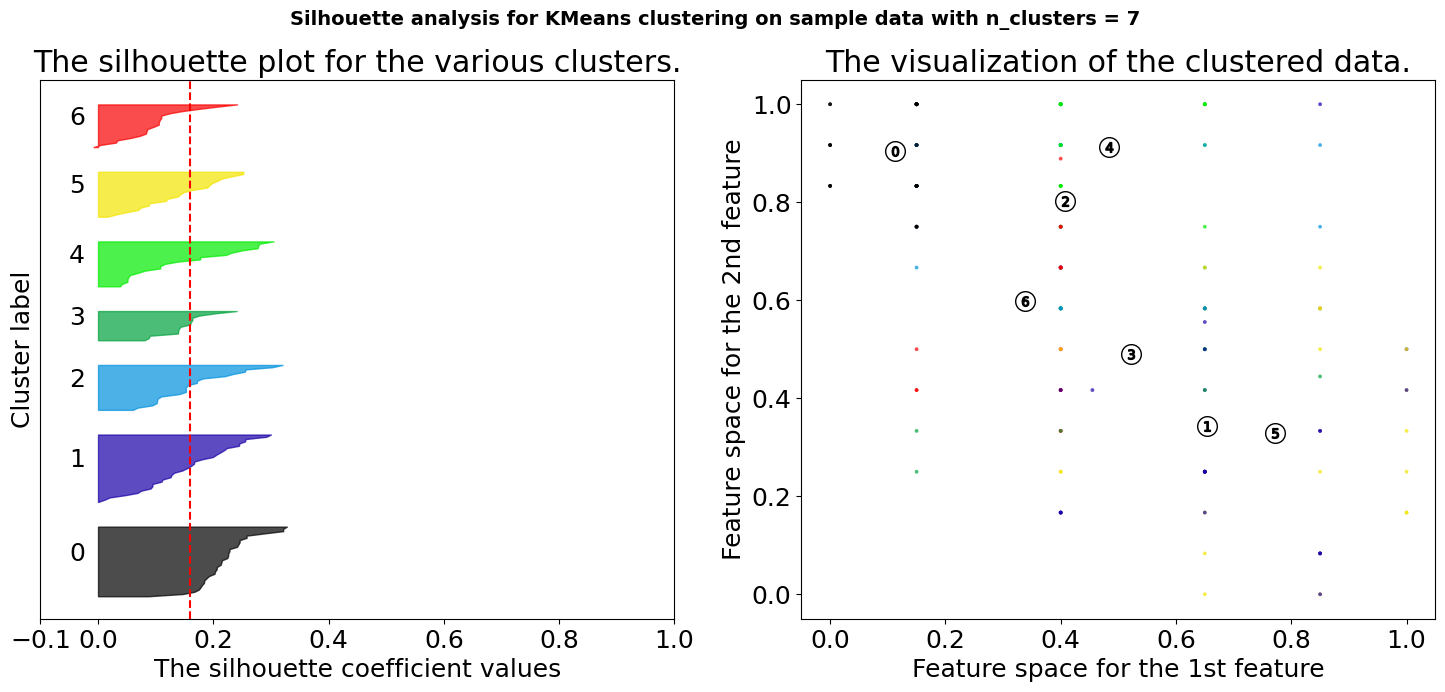

In [77]:
X = X_nrm

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 1], X.iloc[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 1], centers[:, 2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### New Silhouette agglomerative

In [78]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

In [79]:
range_clusters = [i for i in range(2, 20)]
def Silhouette_Agglomerative(X):
    # Specify the number of clusters
    for n_clusters in range_clusters:

        # Create an AgglomerativeClustering model
        model = AgglomerativeClustering(n_clusters=n_clusters)
        # Fit the model to the data
        model.fit(X)
        # Get cluster labels for each data point
        labels = model.labels_

        # Calculate the silhouette score
        silhouette_avg = silhouette_score(X, labels)

        print(f"Silhouette Score for {n_clusters} : {silhouette_avg}")

In [80]:
Silhouette_Agglomerative(X_std)

Silhouette Score for 2 : 0.38453743380638505
Silhouette Score for 3 : 0.34926131841608227
Silhouette Score for 4 : 0.29679371973920016
Silhouette Score for 5 : 0.2170821815352689
Silhouette Score for 6 : 0.1518211983206316
Silhouette Score for 7 : 0.15336652292851793
Silhouette Score for 8 : 0.15702399902986494
Silhouette Score for 9 : 0.1572099148465965
Silhouette Score for 10 : 0.15309458324331326
Silhouette Score for 11 : 0.15334708838949873
Silhouette Score for 12 : 0.14947193309097034
Silhouette Score for 13 : 0.151007169241998
Silhouette Score for 14 : 0.1533230991452962
Silhouette Score for 15 : 0.16090915350092208
Silhouette Score for 16 : 0.15520856855315363
Silhouette Score for 17 : 0.14747510944142767
Silhouette Score for 18 : 0.15280764405649522
Silhouette Score for 19 : 0.1528628123174514


In [81]:
Silhouette_Agglomerative(X_nrm)

Silhouette Score for 2 : 0.4118885036922242
Silhouette Score for 3 : 0.3777997965410062
Silhouette Score for 4 : 0.30848229459762616
Silhouette Score for 5 : 0.2418607289498608
Silhouette Score for 6 : 0.24177123353654278
Silhouette Score for 7 : 0.14760007893996763
Silhouette Score for 8 : 0.14733946915540588
Silhouette Score for 9 : 0.14579992512040713
Silhouette Score for 10 : 0.13686962927854288
Silhouette Score for 11 : 0.13963234499556135
Silhouette Score for 12 : 0.14393095198297248
Silhouette Score for 13 : 0.14417262226311034
Silhouette Score for 14 : 0.14509128942553984
Silhouette Score for 15 : 0.14521477233586302
Silhouette Score for 16 : 0.1560831518585742
Silhouette Score for 17 : 0.15289136788292723
Silhouette Score for 18 : 0.15742920601160387
Silhouette Score for 19 : 0.1582729906788126
